## Première étape : test API
### Ici je fais un appel pour prévisualiser les données et voir si tout fonctionne correctement

In [17]:
# Importation des bibliothèque 

from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json
import pandas as pd

df = pd.DataFrame()  # Déclaration globale une seule fois

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'15', # J'ai fixé une limite des 15 premières cryptomonnaies
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '24f38925-59b9-46eb-9477-4fb57e195f8f',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

{'status': {'timestamp': '2025-06-17T14:33:46.769Z', 'error_code': 0, 'error_message': None, 'elapsed': 30, 'credit_count': 1, 'notice': None, 'total_count': 9639}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 12217, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'para

In [18]:
# Certaines colonnes ne s'affichait pas donc j'ai utilisé cette méthode pour afficher toute les colonnes 
pd.set_option('display.max_columns', None)


In [19]:
# Ici j'affiche les données sous forme de dataframe pour une meilleur observation des données
df = pd.json_normalize(data['data'])
df['timestamp'] = pd.to_datetime('now')
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,12217,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19878000.00000,19878000.00000,False,NaN,1,NaN,NaN,None,2025-06-17T14:32:00.000Z,105386.39537,54040053238.14980,24.77460,-0.24744,-1.90508,-3.13236,0.50828,24.77146,25.39016,2094870767210.68384,63.81950,2213114302818.41016,None,2025-06-17T14:32:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-06-17 15:33:50.097114
1,1027,Ethereum,ETH,ethereum,10345,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120720837.72829,120720837.72829,True,NaN,2,NaN,NaN,None,2025-06-17T14:33:00.000Z,2559.68637,24925656889.64891,35.90190,0.18011,-3.11799,-6.32590,0.85721,61.25214,26.41180,309007483469.08636,9.41100,309007483469.09003,None,2025-06-17T14:33:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-06-17 15:33:50.097114
2,825,Tether USDt,USDT,tether,132955,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, usd-stab...",NaN,155476225902.81683,156996633420.23590,True,NaN,3,NaN,NaN,None,2025-06-17T14:32:00.000Z,1.00017,85048032243.66261,26.66000,-0.02915,-0.02506,0.00236,0.02698,0.03338,-0.02552,155501978138.40103,4.73930,157022637487.84000,None,2025-06-17T14:32:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2025-06-17 15:33:50.097114
3,52,XRP,XRP,xrp,1626,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, xrp...",100000000000.00000,58881764070.00000,99986037638.00000,False,NaN,4,NaN,NaN,None,2025-06-17T14:33:00.000Z,2.21190,4904858456.43498,78.85930,-0.30230,-2.10582,-2.89840,-8.30335,6.76322,-11.92581,130240802819.35843,3.96650,221190388699.17001,None,2025-06-17T14:33:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-06-17 15:33:50.097114
4,1839,BNB,BNB,bnb,2585,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,140886299.16000,140886299.16000,False,NaN,5,NaN,NaN,None,2025-06-17T14:33:00.000Z,652.52670,1726466302.10465,13.74050,-0.44629,-0.84387,-1.31290,0.47577,10.25767,6.82057,91932071989.76938,2.79980,91932071989.77000,None,2025-06-17T14:33:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-06-17 15:33:50.097114
5,5426,Solana,SOL,solana,936,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,527872554.63874,603289232.32570,True,NaN,6,525236893.30000,78935284829.56281,None,2025-06-17T14:33:00.000Z,150.28511,4378330255.62173,-8.57080,0.15093,-4.28560,-4.66138,-13.10434,12.29617,14.34315,79331385486.50810,2.41610,90665389266.63000,None,2025-06-17T14:33:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-06-17 15:33:50.097114
6,3408,USDC,USDC,usd-coin,28707,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,61602809420.33171,61602809420.33171,False,NaN,7,60901219650.23000,60902187571.30024,None,2025-06-17T14:33:00.000Z,1.00002,12216192869.79399,32.88200,0.00303,-0.03218,0.01645,0.04708,0.01003,0.01515,61603788491.97537,1.87720,61603788491.98000,None,2025-06-17T14:33:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2025-06-17 15:33:50.097114
7,1958,TRON,TRX,tron,1187,2017-09-13T00:00:00.000Z,"[media, payments, tron-ecosystem, layer-1, dwf...",NaN,94831906796.41229,94831950217.22784,True,NaN,8,71659659264.00000,20007296932.84052,None,2025-06-17T14:32:00.000Z,0.27920,996494959.00672,-4.38990,-0.13850,0.30580,-4.79854,2.12428,14.86824,21.08835,26476

## Seconde étape : automatison le processus d'actualisation des données en temps réel
### Mon projet commence. Mon but est d'automatiser la collecte d'information sur les cryptomonnaies et les stocker dans un fichier CSV en local
### runner_api() est la fonction que j'ai crée pour automatiser ce travail


In [20]:
# Importation des bibliothèques 
import os
import pandas as pd
import json
from requests import Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
from time import sleep

# La fonction runner_api qui va se charger d'automatiser ma collecte
def runner_api():
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
        'start': '1',
        'limit': '15',
        'convert': 'USD'
    }
    headers = {
        'Accepts': 'application/json',
        'X-CMC_PRO_API_KEY': '24f38925-59b9-46eb-9477-4fb57e195f8f',
    }

    session = Session()
    session.headers.update(headers)

    try:
        response = session.get(url, params=parameters)
        data = json.loads(response.text)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
        print("Erreur API :", e)
        return

    df_new = pd.json_normalize(data['data'])
    df_new['timestamp'] = pd.to_datetime('now')

    path = r'C:\Users\pc\Desktop\API Handling\API.csv'

# Ici j'utilise la méthode try, except pour gérer les erreurs qui peuvent survenir et bloquer le problème comme les coupures de courant par exemple

    if os.path.isfile(path):
        try:
            df_old = pd.read_csv(path)
            # Fusion sur la colonne 'id' (unique pour chaque crypto)
            df_merged = pd.merge(df_old, df_new, on='id', how='outer', suffixes=('_old', ''))
            # Supprime les anciennes colonnes (ex: name_old, symbol_old...)
            df_final = df_new  # ou améliore la fusion pour conserver certains champs si tu veux
        except Exception as e:
            print("⚠️ Erreur lors du chargement ou de la fusion :", e)
            df_final = df_new
    else:
        df_final = df_new

    try:
        df_final.to_csv(path, index=False)
        print("✅ Fichier mis à jour avec succès.")
    except PermissionError as e:
        print("🚫 Problème d'accès au fichier CSV :", e)


In [ ]:
# Fichier pour stocker le numéro du dernier appel réussi comme ça lors de la prochaine collecte ma fonction runner_api() sait où elle s'est arrêté
compteur_file = 'compteur.txt'

# Lecture de la position actuelle (ou 0 si c’est la première fois)
if os.path.exists(compteur_file):
    with open(compteur_file, 'r') as f:
        try:
            start_index = int(f.read())
        except:
            start_index = 0
else:
    start_index = 0

# Lancement de la boucle avec reprise automatique
for i in range(start_index, 333):
    print(f"📡 Appel {i+1}")
    try:
        runner_api()

        # Mise à jour du compteur après chaque appel réussi
        with open(compteur_file, 'w') as f:
            f.write(str(i + 1))

    except Exception as e:
        print(f"❌ Erreur pendant l'appel {i+1} :", e)
    
    sleep(60)  # Pause d'une minute entre les appels

## Nettoyage des donnée et Visualisation 
### Maintenant qu'on a pu tout automatiser nous allons passer au nettoyage des données. Nous avons besoins pour chaque cryptomonnaie d'analyer ses variation chaque 1H, 24h, 7d, 30d, 60d, et enfin 90d. Nous allons donc selectionner uniquement les colonnes appropiés.

### L'objectif ici est d'analyser les variation dans le temps de chaque cryptomonnaie les unes par rapport aux autres.

In [ ]:
# Certaine données sont dans un format mathématique qui peut rendre l'analyse complexe. Je les transforme donc en float 
# (nombre à virgule) avec 5 chiffres après la virgules.

pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [ ]:
# Je range ces données dans un dataframe en fonction des colonnes que j'ai choisie 

df3 = df.groupby('name', sort = False)[['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d']].mean()
df3

In [8]:
# Je classe ces données en seulement deux colonnes 3 colonnes pour une meilleur visibilité

pd.set_option('display.max_rows', None)  # Affiche toutes les lignes
pd.set_option('display.max_columns', None)

df4 = df3.stack()
df4

name                                      
Bitcoin       quote.USD.percent_change_1h     -0.04623
              quote.USD.percent_change_24h    -1.50615
              quote.USD.percent_change_7d     -3.25188
              quote.USD.percent_change_30d     0.70259
              quote.USD.percent_change_60d    24.81129
              quote.USD.percent_change_90d    25.09986
Ethereum      quote.USD.percent_change_1h      0.45458
              quote.USD.percent_change_24h    -2.76295
              quote.USD.percent_change_7d     -6.67558
              quote.USD.percent_change_30d     0.90831
              quote.USD.percent_change_60d    60.96405
              quote.USD.percent_change_90d    25.90830
Tether USDt   quote.USD.percent_change_1h     -0.00748
              quote.USD.percent_change_24h    -0.01539
              quote.USD.percent_change_7d     -0.01384
              quote.USD.percent_change_30d     0.00586
              quote.USD.percent_change_60d     0.02253
              quote.US

In [ ]:
# Ici encore pour un aspect plus esthétique je range ces données dans un frame

df5 = df4.to_frame(name= 'values')
df5

In [ ]:
# Une indexation des valeurs est nécéssaire il faut donc compter le nombre de valeur qu'on a 
df5.count()

In [ ]:
# Après avoir compter je vais les indexer 

index = pd.Index(range(90))
df6 = df5.reset_index()
df7 = df6.rename(columns={'level_1' : 'percent_change'})
df7

In [12]:
# Je remplace quote.USD.percent_change_[time] par juste 1h, 24h ...
df7['percent_change'] = df7['percent_change'].replace(['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d'],['1h','24h','7d','30d','60d','90d'])
df7

,name,percent_change,values
0,Bitcoin,1h,-0.04623
1,Bitcoin,24h,-1.50615
2,Bitcoin,7d,-3.25188
3,Bitcoin,30d,0.70259
4,Bitcoin,60d,24.81129
5,Bitcoin,90d,25.09986
6,Ethereum,1h,0.45458
7,Ethereum,24h,-2.76295
8,Ethereum,7d,-6.67558
9,Ethereum,30d,0.90831


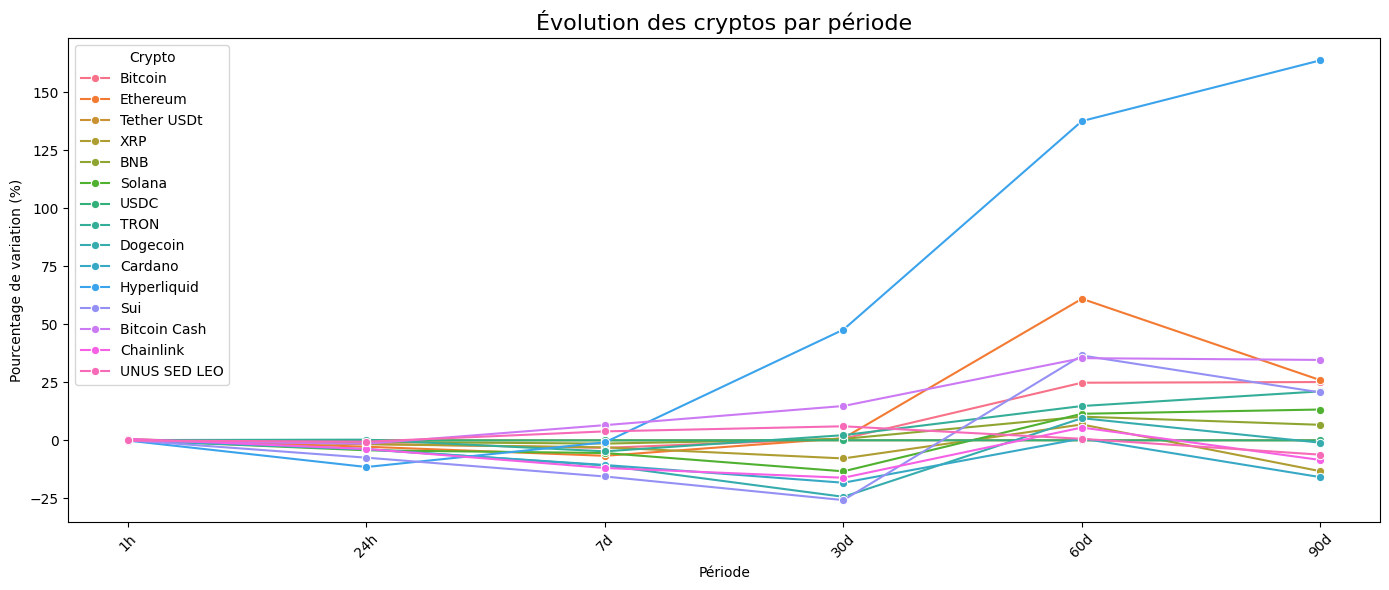

In [15]:
# Visualition des crypto par période
plt.figure(figsize=(14, 6))
sns.lineplot(x='percent_change', y='values', hue='name', data=df7, marker='o')
plt.xticks(rotation=45)
plt.title("Évolution des cryptos par période", fontsize=16)
plt.xlabel("Période")
plt.ylabel("Pourcentage de variation (%)")
plt.legend(title="Crypto")
plt.tight_layout()
plt.show()


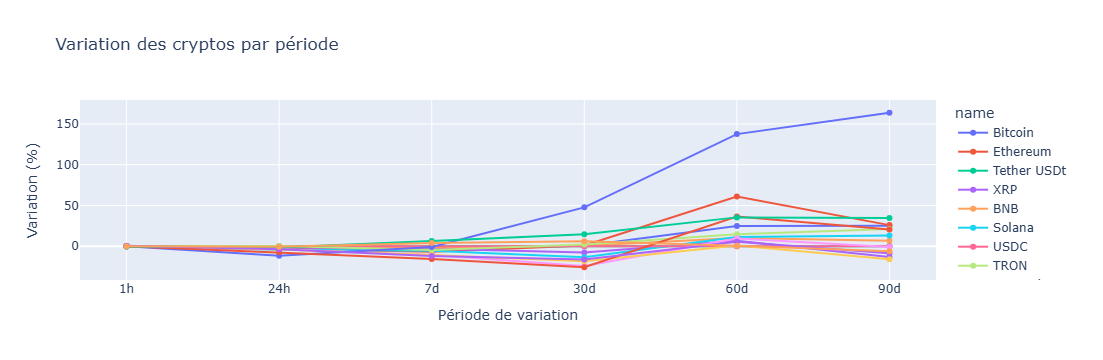

In [16]:
# J'utilise ploty pour une visualisation dynamique de mes données

import plotly.express as px

# Supposons que df7 a les colonnes : 'percent_change', 'values', 'name'
fig = px.scatter(
    df7,
    x="percent_change",
    y="values",
    color="name",
    hover_name="name",
    title="Variation des cryptos par période",
    labels={
        "percent_change": "Période de variation",
        "values": "Variation (%)"
    }
)

fig.update_traces(mode="lines+markers")  # Relier les points
fig.show()
